In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_diab = pd.read_csv('diabetes.csv')

In [ ]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diab.shape

(768, 9)

In [ ]:
df_diab.Outcome.unique()

array([1, 0])

In [ ]:
df_diab.Outcome.value_counts()/df_diab.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab['Outcome']

In [ ]:
np.random.seed(12345)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [ ]:
y_train.sum()/614, y_test.sum()/154

(0.3485342019543974, 0.35064935064935066)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# X-scaled = (X - mean)/sd -> z value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
np.__version__

'1.23.5'

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = Sequential()

In [ ]:
X_train_scaled.shape[1]

8

In [ ]:
model.add(Input(shape = (X_train_scaled.shape[1],))) # Input Layer

In [ ]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [ ]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu activation
model.add(Dense(units=32, activation='relu'))

In [ ]:
# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(8+1)*128, (128+1)*64, (64+1)*32, (32+1)*1

(1152, 8256, 2080, 33)

In [ ]:
#(8+1)*128
#(128+1)*64
#(64+1)*32

In [ ]:
(1152+8256+2080+33)

11521

In [ ]:
model.compile(optimizer='adam', # Variant of Gradient Descent
              loss= 'binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [ ]:
result = model.fit(X_train_scaled,
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.6502 - accuracy: 0.6303 - val_loss: 0.5604 - val_accuracy: 0.7143
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.7541 - val_loss: 0.4830 - val_accuracy: 0.7727
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7671 - val_loss: 0.4452 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4680 - accuracy: 0.7720 - val_loss: 0.4312 - val_accuracy: 0.7987
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.7785 - val_loss: 0.4324 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.7834 - val_loss: 0.4259 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.7915 - val_loss: 0.4253 - val_accuracy: 0.7792
Epoch 8/100


In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_pred=y_train_pred >= 0.5,
                 y_true = y_train)

array([[372,  28],
       [  0, 214]])

In [ ]:
accuracy_score(y_pred=y_train_pred >= 0.5,
               y_true = y_train)

0.9543973941368078

In [ ]:
confusion_matrix(y_pred=y_test_pred >= 0.5,
                 y_true = y_test)

array([[68, 32],
       [13, 41]])

In [ ]:
accuracy_score(y_pred=y_test_pred >= 0.5,
               y_true = y_test)

0.7077922077922078

In [ ]:
history = pd.DataFrame(result.history)

In [ ]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650236,0.630293,0.560425,0.714286
1,0.533095,0.754072,0.483029,0.772727
2,0.482575,0.767101,0.445225,0.779221
3,0.467983,0.771987,0.431163,0.798701
4,0.450478,0.778502,0.432402,0.785714


In [ ]:
import matplotlib.pyplot as plt

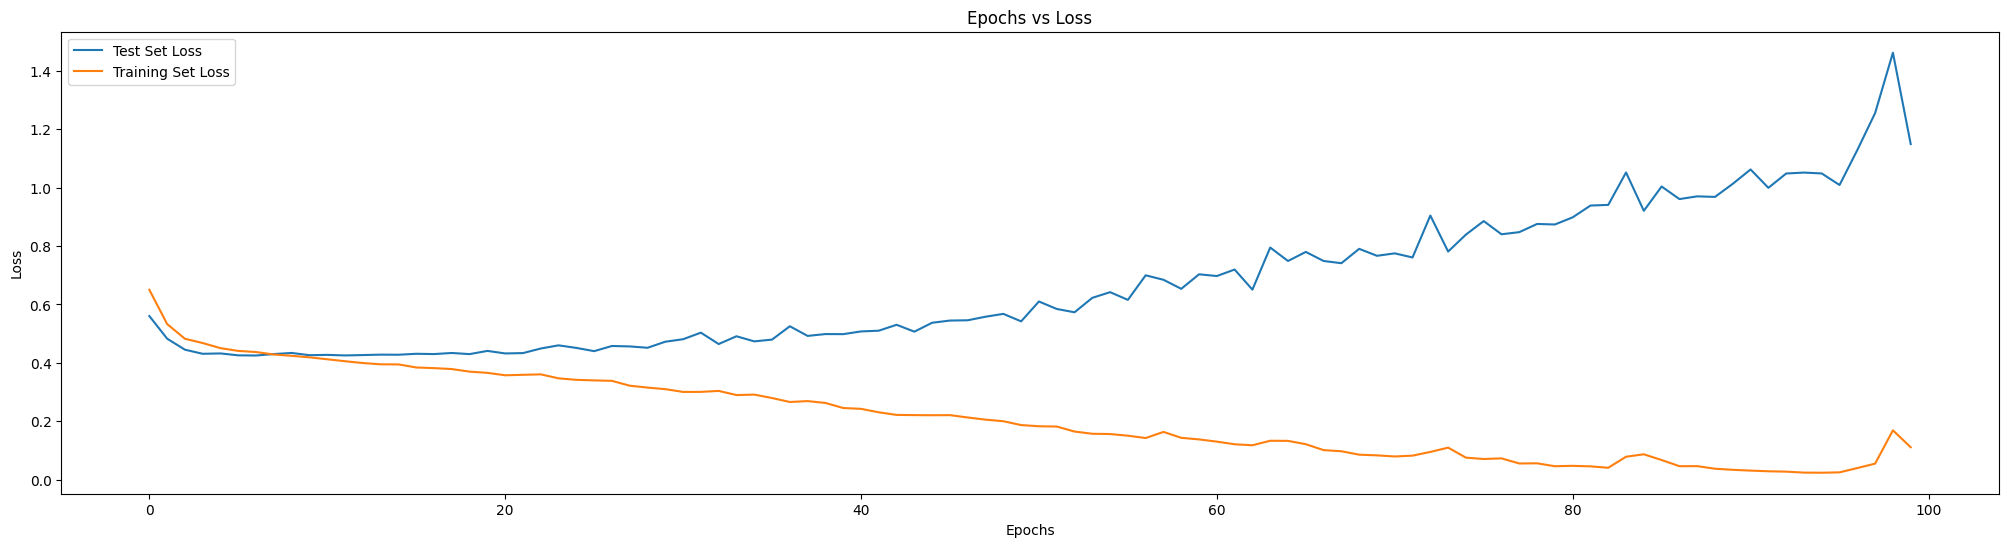

In [ ]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

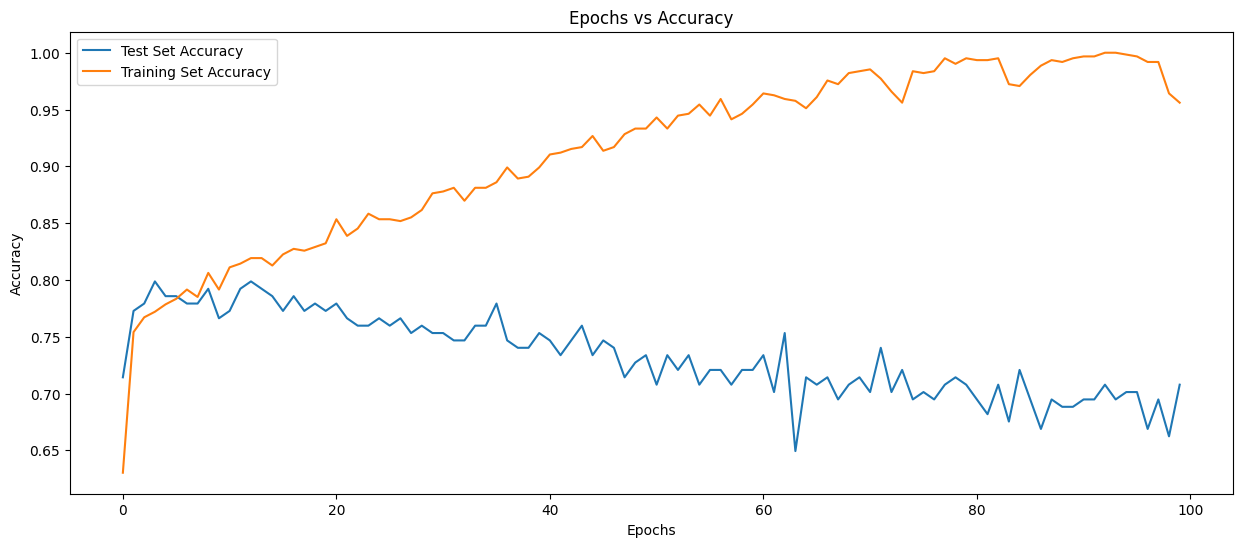

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()